# BIOMEDIN 260/RAD260: Problem Set 2 - Mammography Binary Classification

## Spring 2024

## Group Members

**Person 1:**

Xianghao Zhan

Welcome to Problem Set 2!

## Problem 1: Geometric Features (20 points)

As you may recall from class, the geometric features of a tumor can sometimes reveal significant information about whether it is benign or malignant. [Radiologists frequently assess the geometry of lesions in mammograms when attempting to diagnose breast cancer](https://www.sciencedirect.com/science/article/pii/S2211568413003872).

In this exercise, we will attempt to explore some quantitative methods of differentiating between certain lesion shapes.

Download the two mammograms from Canvas. `LEFT_CC_BENIGN.tif` depicts a cranial-caudal view (looking down on the breast from the patient's perspective) of the left breast. There is a benign lesion present in the mammogram. Can you locate it?

If you are having difficulty locating the lesion, try seeing if you can spot it in the mask `LEFT_CC_BENIGN_MASK.tif`, which consists of a rough segmentation of the lesion. `RIGHT_CC_MALIGNANT.tif` and `RIGHT_CC_MALIGNANT_MASK.tif` are the mammogram and corresponding lesion segmentation of a different patient, but this mammogram depicts a breast with a **malignant** tumor.

**a.** Start by loading these two mammograms and their corresponding masks as image matrices. Plot them on a single figure (using a 2-by-2 grid of subplots). You should use reasonable **x** and **y** limits in your figures to get a reasonable depiction of your lesion segmentations.

Qualitatively describe the shape differences between the two lesions. What types of shapes and margins are indicative of malignant tumors?

In [1]:
# If using Google Colab:
import os
from google.colab import drive
drive.mount('/content/drive/')
# TODO: Import data from Google Drive

Mounted at /content/drive/


In [2]:
#lets install SimpleITK first
import sys
!{sys.executable} -m pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.2 MB/s eta 0:00:00


In [3]:
cd "/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2"

/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2


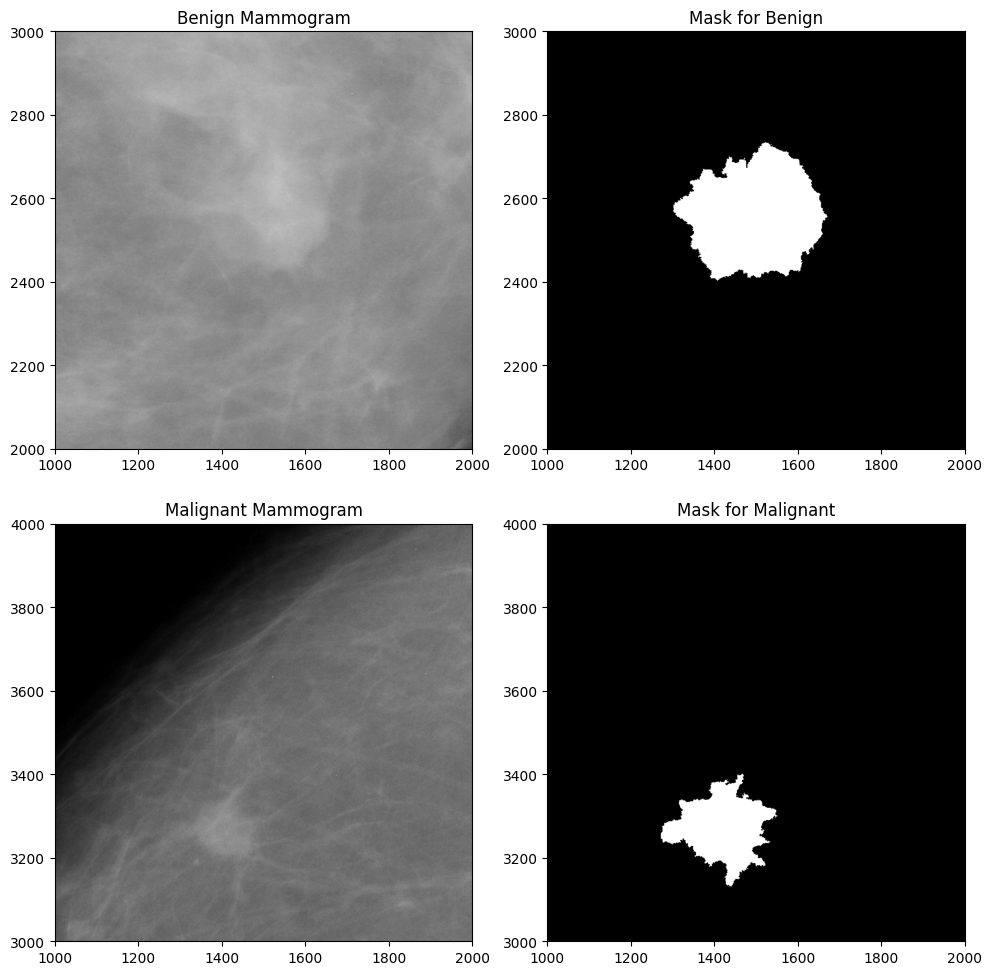

In [4]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import SimpleITK as sitk
%matplotlib inline

## Load mammograms showing benign and malignant tumors.

img_benign = sitk.ReadImage('LEFT_CC_BENIGN.tif')
mask_benign = sitk.ReadImage('LEFT_CC_BENIGN_MASK.tif')

img_malignant = sitk.ReadImage('RIGHT_CC_MALIGNANT.tif')
mask_malignant = sitk.ReadImage('RIGHT_CC_MALIGNANT_MASK.tif')

# converting sitk images to np arrays
img_benign_np = sitk.GetArrayFromImage(img_benign)
mask_benign_np = sitk.GetArrayFromImage(mask_benign)

img_malignant_np = sitk.GetArrayFromImage(img_malignant)
mask_malignant_np = sitk.GetArrayFromImage(mask_malignant)

## TODO: Plotting code here

### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######

# Create a 2x2 subplot
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plotting the images and masks
ax[0, 0].imshow(img_benign_np, cmap='gray')
ax[0, 0].set_title('Benign Mammogram')
ax[0, 0].set_xlim([1000,2000])
ax[0, 0].set_ylim([2000,3000])

ax[0, 1].imshow(mask_benign_np, cmap='gray')
ax[0, 1].set_title('Mask for Benign')
ax[0, 1].set_xlim([1000,2000])
ax[0, 1].set_ylim([2000,3000])

ax[1, 0].imshow(img_malignant_np, cmap='gray')
ax[1, 0].set_title('Malignant Mammogram')
ax[1, 0].set_xlim([1000,2000])
ax[1, 0].set_ylim([3000,4000])

ax[1, 1].imshow(mask_malignant_np, cmap='gray')
ax[1, 1].set_title('Mask for Malignant')
ax[1, 1].set_xlim([1000,2000])
ax[1, 1].set_ylim([3000,4000])

plt.tight_layout()
plt.show()
######################################################################################################

**Answer:** The more spiky shape is indicative of the maligant tumors

**b.** Next, try computing some basic geometric features of the two lesions. Which features are the most significant for differentiating between them? Is this what you expected? The `regionprops()` function in the `skimage` library will automatically compute several geometric features for you, but you might choose to code up some of your own. If you don't trust the provided segmentations, feel free to create your segmentation method or modify the provided ones to get a better estimate of the lesion shapes! Finally, it could be interesting to apply some edge-detection filters to the mammograms to better emphasize the margins.

You can also test your approach on other mammograms from a [larger dataset (~20 GB)](https://drive.google.com/drive/folders/1v7Xthd7gngVdOyQ29TBSHb9xeXmL_bX-?usp=sharing) (Stanford Google account required for access). You will need these mammograms for the next part of the problem set, so there's no harm in loading in or downloading the images now!

**There is no single correct answer for this exercise, and you should definitely try several different approaches and explore, and be sure to explain your interpretation of your findings!**

**Answer:** According to the results, it seems that solidity is a good feature to discriminate benign tumors from malignant tumors.

In [5]:
from skimage.measure import regionprops

### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######
from skimage.measure import label, regionprops_table

label_benign = label(mask_benign_np)
label_malignant = label(mask_malignant_np)

regions_benign = regionprops(label_benign)
regions_malignant = regionprops(label_malignant)

def print_region_properties(regions, tumor_type, min_area=100):
    print(f"Properties for {tumor_type} tumors:")
    for i, region in enumerate(regions):
        if region.area > min_area:  # Filter out very small regions
            print(f"  Tumor {i+1}:")
            print(f"    Area: {region.area}")
            print(f"    Perimeter: {region.perimeter}")
            print(f"    Eccentricity: {region.eccentricity}")
            print(f"    Solidity: {region.solidity}")

print_region_properties(regions_benign, "Benign")
print_region_properties(regions_malignant, "Malignant")
######################################################################################################

Properties for Benign tumors:
  Tumor 1:
    Area: 79148
    Perimeter: 1696.481456229631
    Eccentricity: 0.4772014180075201
    Solidity: 0.8917783060854281
Properties for Malignant tumors:
  Tumor 2:
    Area: 35507
    Perimeter: 1499.2844507162113
    Eccentricity: 0.4845676212963806
    Solidity: 0.7188233865090291


## Problem 2: Radiomic Classifier (80 points)

Start by loading in / downloading the large mammogram set from [here (~20 GB)](https://drive.google.com/drive/folders/1v7Xthd7gngVdOyQ29TBSHb9xeXmL_bX-?usp=sharing) (Stanford Google account required for access).

Computing features can be complicated very quickly, and specialized radiomics packages exist to help the process (e.g., [pyradiomics](https://pyradiomics.readthedocs.io/en/latest/)). Such packages are often well tested and are used by many in research studies and described in papers.

For the next exercise, you will use the package `pyradiomics` and perform a binary classification task, to distinguish between two categories, benign and malignant breast nodules (labels provided in [labels_small.csv](https://drive.google.com/file/d/1c-Hbz8bGtZTjYdKnkGoWMPu0GKWAonMu/view?usp=sharing)). Here, we are interested in implementing and testing the different steps required to implement a machine learning classifier and the experimental design for how to train a classifier using medical images.

Training classifiers using medical data can be tricky, so in this exercise, the experimental design (how you compute the features, what classifier and evaluation strategies), are more important than the final accuracy. **You are not going to be graded on the accuracy of your model, but on how you got to your answers. **

### a) Extract Features (20 points)

Install [pyradiomics](https://pyradiomics.readthedocs.io/en/latest/), and go over the online documentation to identify what features can be extracted and how one can adjust their parameters within pyradiomics.

Extract the following three types of features:
 * morphologic shape2D features
 * first order statistics
 * haralick features (derived from Gray Level Co-occurrence Matrices)

By default, the feature extractor in pyradiomics will extract a lot more features, so follow the documents to figure out how to extract only a subset of features.

**Side note**: Pyradiomics requires a well know package for medical images, i.e., [SimpleITK](https://simpleitk.org/). While you can read your data using other packages, its a lot easier to just use SimpleITK for both reading and pushing images into pyradiomics.

Follow the next steps to answer this question:  


(i)	Use SimpleITK (sitk) to read one image and the corresponding mask from the dataset. Check if the size, origin, spacing, and direction of the image and the corresponding mask are same using sitk functions. Use sitk.SetOrigin(), sitk.SetSpacing() etc. functions to align the origin, spacing, and direction of the mask to the image, if they are not aligned. Why is this alignment important?

(ii)	Use a parameter file to specify parameters for feature extraction and extract radiomics features using this parameter file. See an example parameter file for 2D images here: https://github.com/AIM-Harvard/pyradiomics/blob/master/examples/exampleSettings/MR_2D_extraction.yaml .
Modify this parameter file to (1) use original images without any filtering, and (2) extract morphologic features, first order statistics, and Haralick features only, (3) remove the resampledPixelSpacing parameter, (4) set binwidth to 40. You can leave the other parameter settings in this file intact.

(iii)	Play with the parameter setting ‘binwidth’ and extract features with 3 widely different binwidth values. Does varying binwidth affect extracted features? Why?

**Note**: You only need to extract features for *1000 randomly sampled images*.

**Answer:** i) Alignment makes the masks meaningful segmentation of the tumor. Otherwise, the segmentation doesn't have a value if not overlapping with the raw images.

ii)
imageType:
  Original: {}

featureClass:
  shape2D:{}
  firstorder:{}
  glcm:{}


setting:
  normalize: true
  normalizeScale: 100
  
  padDistance: 10
  preCrop: true

  force2D: true
  force2Ddimension: 0
  
  binWidth: 40

  voxelArrayShift: 300

  label: 1
  
iii) Yes because bin width is a parameter used in the discretization process of image intensities. It defines the size of the intervals that the range of image intensities is divided into before calculating texture and other statistical features. Too coarse the bins are will lead to loss of information while too fine the bins are will lead to noise in the fine details of the relative changes in the pixel insensities.

In [5]:
#lets install pyradiomics first
import sys
!{sys.executable} -m pip install pyradiomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 32.4 MB/s eta 0:0

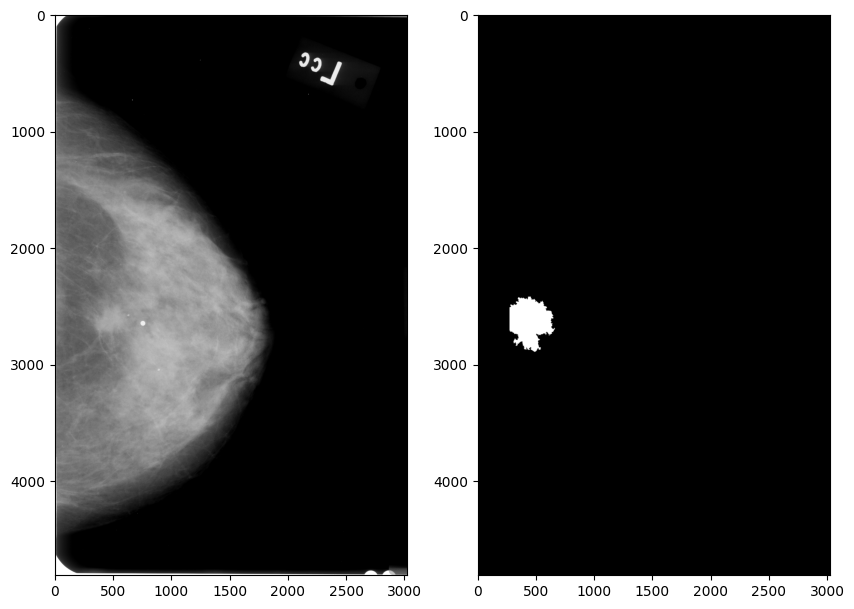

In [7]:
### WRITE CODE IN HERE.#######

#importing relevant libraries
import SimpleITK as sitk

##### ------ reading the first image and the correpsonding mask
img = sitk.ReadImage('/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/images/images/P_00001_LEFT_CC.tif')
mask = sitk.ReadImage('/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/masks/masks/P_00001_LEFT_CC.tif')

img_np = sitk.GetArrayFromImage(img)
mask_np = sitk.GetArrayFromImage(mask)

fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax[0].imshow(img_np, cmap = 'gray')
ax[1].imshow(mask_np, cmap = 'gray')
######################################################################################################

(3024, 4808) (3024, 4808)
(0.35277777777777775, 0.35277777777777775) (1.0, 1.0)
(1.0, 0.0, 0.0, 1.0) (1.0, 0.0, 0.0, 1.0)
(0.0, 0.0) (0.0, 0.0)
(3024, 4808) (3024, 4808)
(1.0, 1.0) (1.0, 1.0)
(1.0, 0.0, 0.0, 1.0) (1.0, 0.0, 0.0, 1.0)
(0.0, 0.0) (0.0, 0.0)


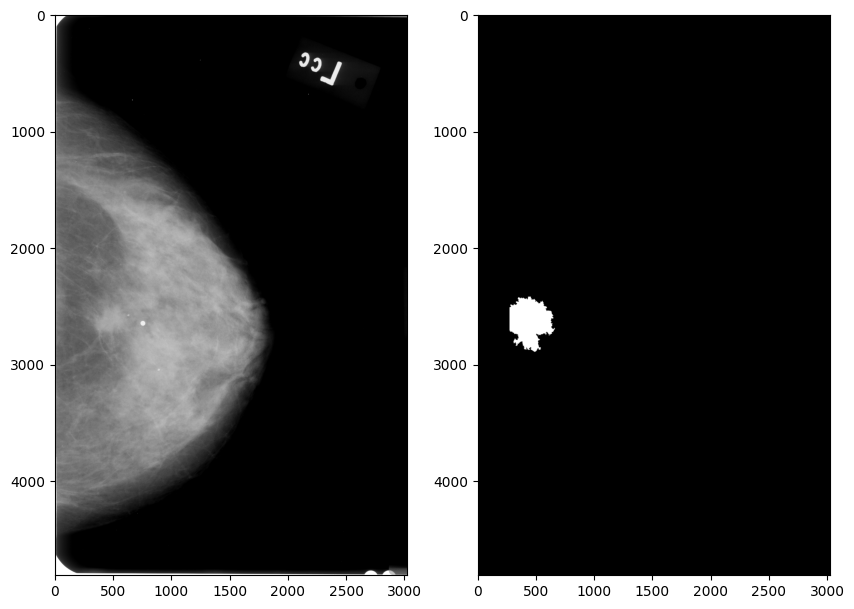

In [8]:
print(img.GetSize(), mask.GetSize())
print(img.GetSpacing(), mask.GetSpacing())
print(img.GetDirection(), mask.GetDirection())
print(img.GetOrigin(), mask.GetOrigin())

#img spacing needs to be reset to be the same as the mask spacing
img.SetSpacing((1.0, 1.0))

print(img.GetSize(), mask.GetSize())
print(img.GetSpacing(), mask.GetSpacing())
print(img.GetDirection(), mask.GetDirection())
print(img.GetOrigin(), mask.GetOrigin())

img_np = sitk.GetArrayFromImage(img)
mask_np = sitk.GetArrayFromImage(mask)

fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax[0].imshow(img_np, cmap = 'gray')
ax[1].imshow(mask_np, cmap = 'gray')

In [9]:
from radiomics import featureextractor

extractor1 = featureextractor.RadiomicsFeatureExtractor('/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/modified_Bin40.yaml')
extractor2 = featureextractor.RadiomicsFeatureExtractor('/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/modified_Bin4.yaml')
extractor3 = featureextractor.RadiomicsFeatureExtractor('/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/modified_Bin400.yaml')

feature1 = extractor1.execute(img, mask, label = 255)
feature2 = extractor2.execute(img, mask, label = 255)
feature3 = extractor3.execute(img, mask, label = 255)

INFO:radiomics.featureextractor:Loading parameter file /content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/modified_Bin40.yaml
INFO:radiomics.featureextractor:Loading parameter file /content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/modified_Bin4.yaml
INFO:radiomics.featureextractor:Loading parameter file /content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/modified_Bin400.yaml
INFO:radiomics.featureextractor:Calculating features with label: 255
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape2D
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Calculating features with label: 255
INFO:radiomi

In [10]:
keys = list(feature1.keys())
numeric_keys = keys[keys.index('original_shape2D_Elongation'):] # Remove the PyRadiomics and Image information, since "original_shape2D_Elongation" is the first real feature"
#Evaluate the influence of varying bins
for key in numeric_keys:
    print(key, '\t', feature1[key], '\t', feature2[key], '\t', feature3[key])

original_shape2D_Elongation 	 0.8444555376960288 	 0.8444555376960288 	 0.8444555376960288
original_shape2D_MajorAxisLength 	 438.5273784954608 	 438.5273784954608 	 438.5273784954608
original_shape2D_MaximumDiameter 	 490.40799340956914 	 490.40799340956914 	 490.40799340956914
original_shape2D_MeshSurface 	 120549.5 	 120549.5 	 120549.5
original_shape2D_MinorAxisLength 	 370.31687320181425 	 370.31687320181425 	 370.31687320181425
original_shape2D_Perimeter 	 3131.2429996246465 	 3131.2429996246465 	 3131.2429996246465
original_shape2D_PerimeterSurfaceRatio 	 0.02597474895893095 	 0.02597474895893095 	 0.02597474895893095
original_shape2D_PixelSurface 	 120561.0 	 120561.0 	 120561.0
original_shape2D_Sphericity 	 0.3930708758396848 	 0.3930708758396848 	 0.3930708758396848
original_firstorder_10Percentile 	 113.66769521217881 	 113.66769521217881 	 113.66769521217881
original_firstorder_90Percentile 	 195.2285988231382 	 195.2285988231382 	 195.2285988231382
original_firstorder_Ener

In [11]:
len(numeric_keys)

51

In [13]:
import os
import random

image_dir = '/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/images/images'
mask_dir = '/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/masks/masks'

image_lst = os.listdir(image_dir)
mask_lst = os.listdir(mask_dir)

random.seed(9001)
sampled_image_filename = random.sample(image_lst, 1000)

In [14]:
import pandas as pd
import os.path as osp
final_extractor = extractor1 = featureextractor.RadiomicsFeatureExtractor('/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/modified_Bin40.yaml')

result_dict = {}
for image_filename in sampled_image_filename:
    # Read images
    image_path = osp.join(image_dir, image_filename)
    mask_path = osp.join(mask_dir, image_filename)
    img = sitk.ReadImage(image_path)
    mask = sitk.ReadImage(mask_path)

    # Perform alignment
    if img.GetSpacing() != mask.GetSpacing():
        img.SetSpacing(mask.GetSpacing())
    if img.GetOrigin() != mask.GetOrigin():
        img.SetOrigin(mask.GetOrigin())
    if img.GetDirection != mask.GetDirection():
        img.SetDirection(mask.GetDirection())

    # extract features
    feature = final_extractor.execute(img, mask, label = 255)
    keys = list(feature.keys())
    numeric_keys = keys[keys.index('original_shape2D_Elongation'):] # Remove the PyRadiomics and Image information, since "original_shape2D_Elongation" is the first real feature"

    if len(result_dict.keys()) == 0: # The first image, initialize the result_dictionary
        result_dict = {key: [] for key in numeric_keys}
        result_dict['Index'] = [] # Add an index column

    # Append the extracted features for a new image to the result dictionary
    for key, value in feature.items():
        if key in result_dict.keys():
            result_dict[key].append(value)
    result_dict['Index'].append(image_filename.split('.')[0])

df = pd.DataFrame(result_dict)
df.to_csv('Radiomics_features.csv')

Streaming output truncated to the last 5000 lines.
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Calculating features with label: 255
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape2D
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Calculating features with label: 255
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:C

In [ ]:
df.to_csv('Radiomics_features.csv')

In [11]:
import pandas as pd
df = pd.read_csv('Radiomics_features.csv')

In [12]:
df

,Unnamed: 0,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,...,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,Index
0,0,0.859609,395.948952,432.584096,102356.5,340.361208,2306.608440,0.022535,102369.0,0.491687,...,0.022690,2.541696,0.465914,1.402514,0.972858,0.617530,5.083392,1.379824,0.416089,P_00651_RIGHT_CC
1,1,0.600814,325.505564,323.569158,47416.0,195.568385,1522.729148,0.032114,47418.0,0.506926,...,0.015748,1.970058,0.923261,0.301346,0.746714,0.960524,3.940116,0.285598,0.030705,P_01168_LEFT_CC
2,2,0.744454,283.577838,297.578561,45781.0,211.110544,1232.219480,0.026916,45785.0,0.615545,...,0.072307,2.588147,0.448546,1.353349,0.851418,0.552346,5.176294,1.281042,0.242605,P_01079_RIGHT_MLO
3,3,0.830408,197.179421,230.586209,23214.0,163.739380,1286.739249,0.055429,23217.0,0.419749,...,0.080107,2.795703,0.542835,1.362758,0.825406,0.709662,5.591407,1.282652,0.216869,P_00708_RIGHT_MLO
4,4,0.640427,257.257089,285.630881,31108.5,164.754465,1392.444876,0.044761,31114.0,0.449021,...,0.027628,1.953866,0.885123,0.414552,0.686083,0.940051,3.907731,0.386924,0.044006,P_00135_LEFT_MLO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.691075,205.101107,240.852652,21468.0,141.740284,1040.070201,0.048447,21473.0,0.499388,...,0.008696,1.018526,0.955015,0.187895,0.760876,0.977127,2.037051,0.179199,0.018182,P_00603_RIGHT_MLO
996,996,0.815600,295.769891,297.833846,54933.5,241.229873,1482.736290,0.026991,54933.0,0.560350,...,0.020802,1.966777,0.895126,0.408705,0.773456,0.945543,3.933554,0.387903,0.042952,P_01013_RIGHT_MLO
997,997,0.857538,260.535928,291.207830,41911.5,223.419583,1760.025612,0.041994,41915.0,0.412337,...,0.049142,2.064194,0.535063,1.475192,0.976953,0.713457,4.128388,1.426050,0.396290,P_00962_RIGHT_MLO
998,998,0.834471,255.573253,268.486499,42094.0,213.268514,1375.876334,0.032686,42104.0,0.528610,...,0.053209,2.814010,0.542879,1.314307,0.886995,0.705913,5.628020,1.261098,0.233322,P_00519_RIGHT_MLO


### b) Train a classifier (30 points)

Using the features extracted in step (a) above with a binwidth of 40, train two classifiers, a random forest and a support vector machine classifier to distinguish between benign and malignant nodules. Split the data in training and testing sets with a ratio 80/20 %.

Use traditional metrics to evaluate your two classifiers in the test set, e.g., Accuracy, F1 score. Show the code for the training and evaluation.

Select the following parameters of the classifiers for optimal performance: number of trees and maximum depth of the random forest classifier, kernel functions for the support vector machine classifiers. Comment on why and how you chose specific values for these parameters for your classifier.

*Hint:* The `scikit-learn` python package might be useful.
* scikit-learn [installation](https://scikit-learn.org/stable/install.html)
* scikit-learn [random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* scikit-learn [support vector machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

**Answer:** YOUR WRITTEN ANSWER TO QUESTION 2b HERE

In [14]:
### WRITE CODE IN HERE.#######
from sklearn.model_selection import train_test_split, GridSearchCV
labels = pd.read_csv('./labels_small.csv')
labels = labels.rename(columns={"name": "Index"})

df_y = df.merge(labels, on='Index', how = 'inner') # It should be mentioned only 943 overlapped samples are there

df_y.set_index('Index', inplace=True)
df = df_y.drop(['Unnamed: 0'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2)
######################################################################################################

In [15]:
df_y

,Unnamed: 0,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,...,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,label
Index,,,,,,,,,,,,,,,,,,,,,
P_00651_RIGHT_CC,0,0.859609,395.948952,432.584096,102356.5,340.361208,2306.608440,0.022535,102369.0,0.491687,...,0.022690,2.541696,0.465914,1.402514,0.972858,0.617530,5.083392,1.379824,0.416089,0
P_01168_LEFT_CC,1,0.600814,325.505564,323.569158,47416.0,195.568385,1522.729148,0.032114,47418.0,0.506926,...,0.015748,1.970058,0.923261,0.301346,0.746714,0.960524,3.940116,0.285598,0.030705,1
P_01079_RIGHT_MLO,2,0.744454,283.577838,297.578561,45781.0,211.110544,1232.219480,0.026916,45785.0,0.615545,...,0.072307,2.588147,0.448546,1.353349,0.851418,0.552346,5.176294,1.281042,0.242605,1
P_00708_RIGHT_MLO,3,0.830408,197.179421,230.586209,23214.0,163.739380,1286.739249,0.055429,23217.0,0.419749,...,0.080107,2.795703,0.542835,1.362758,0.825406,0.709662,5.591407,1.282652,0.216869,0
P_00135_LEFT_MLO,4,0.640427,257.257089,285.630881,31108.5,164.754465,1392.444876,0.044761,31114.0,0.449021,...,0.027628,1.953866,0.885123,0.414552,0.686083,0.940051,3.907731,0.386924,0.044006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P_00603_RIGHT_MLO,995,0.691075,205.101107,240.852652,21468.0,141.740284,1040.070201,0.048447,21473.0,0.499388,...,0.008696,1.018526,0.955015,0.187895,0.760876,0.977127,2.037051,0.179199,0.018182,0
P_01013_RIGHT_MLO,996,0.815600,295.769891,297.833846,54933.5,241.229873,1482.736290,0.026991,54933.0,0.560350,...,0.020802,1.966777,0.895126,0.408705,0.773456,0.945543,3.933554,0.387903,0.042952,0
P_00962_RIGHT_MLO,997,0.857538,260.535928,291.207830,41911.5,223.419583,1760.025612,0.041994,41915.0,0.412337,...,0.049142,2.064194,0.535063,1.475192,0.976953,0.713457,4.128388,1.426050,0.396290,1


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve,auc, roc_auc_score, accuracy_score, precision_recall_curve, auc, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

def modelEval(y_true, y_preds, predict_probs):
    auroc = (roc_auc_score(y_true, predict_probs))
    accuracy = (accuracy_score(y_true, y_preds))
    f1 = f1_score(y_true, y_preds)
    precision, recall, threshold = precision_recall_curve(y_true, predict_probs)
    auprc = auc(recall, precision)
    return {"auroc": auroc, "accuracy": accuracy, "auprc": auprc, "f1_score": f1}

def getPredicts(clf, X):
    predict_probs = clf.predict_proba(X)[:, 1]
    predicts = clf.predict(X)
    return predicts, predict_probs
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [18]:
param_grid = {'n_estimators': [50,100,200,300,500],
              'max_depth': [2,5, 8, 10, 12, 15]}
rf = RandomForestClassifier()
gridsearch = GridSearchCV(rf,
                             param_grid=param_grid,
                             scoring = 'accuracy',
                             cv=5)
gridsearch.fit(X_train_std, y_train)

best_rf = gridsearch.best_estimator_
print('Hyperparameter Tuned',':', gridsearch.best_params_)

best_rf.fit(X_train_std, y_train)

preds, pred_probs = getPredicts(best_rf, X_test_std)
result_dict_rf = modelEval(y_test, preds, pred_probs)

print(result_dict_rf)

Hyperparameter Tuned : {'max_depth': 8, 'n_estimators': 50}
{'auroc': 0.47885883155262554, 'accuracy': 0.49206349206349204, 'auprc': 0.4383199497438851, 'f1_score': 0.3924050632911392}


Answer: After tuning the hyperparameter via a five-fold cross validation on the training data with accuracy being the optimizaiton goal, it turned out the best hyperparameter set is: {'max_depth': 8, 'n_estimators': 50}

In [19]:
# support vector machine model
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear','rbf']}
svm = SVC(probability=True)
gridsearch = GridSearchCV(svm,
                             param_grid=param_grid,
                             scoring = 'accuracy',
                             cv=5)
gridsearch.fit(X_train_std, y_train)

best_svm = gridsearch.best_estimator_
print('Hyperparameter Tuned',':', gridsearch.best_params_)

best_svm.fit(X_train_std, y_train)

preds, pred_probs = getPredicts(best_svm, X_test_std)
result_dict_svm = modelEval(y_test, preds, pred_probs)

print(result_dict_svm)

Hyperparameter Tuned : {'C': 1, 'kernel': 'rbf'}
{'auroc': 0.5466583314389634, 'accuracy': 0.5661375661375662, 'auprc': 0.4754172019521953, 'f1_score': 0.4305555555555556}


Answer: After tuning the hyperparameter via a five-fold cross validation on the training data with accuracy being the optimization goal, it turned out that the best hyperparamter set is: {'C': 1, 'kernel': 'rbf'}

### c) Deep Dive into the Random Forest Classifiers (10 points)

**c.** The random forest classifier can output the importance of the features. Please select the most important 10 features - hint: you could use [scikit-learn feature selection](https://scikit-learn.org/stable/modules/feature_selection.html), and read about [forest feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html). Retrain the classifier with the top best features. What happens to the performance?

*Hint:* You may want to check out scikit-learn [random forest classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


**Answer:** YOUR WRITTEN ANSWER TO QUESTION 2c HERE

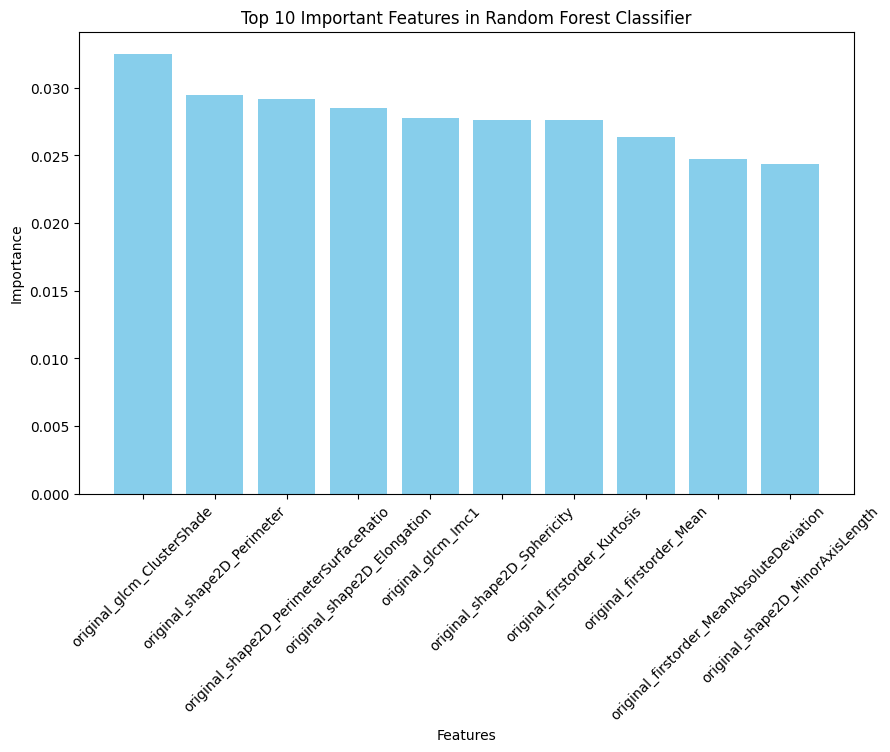

In [21]:
### WRITE CODE IN HERE.#######
import numpy as np
feature_names = np.array(X_train.columns)

feature_importance = np.sort(best_rf.feature_importances_)[::-1]
feature_importance_idx = np.argsort(best_rf.feature_importances_)[::-1]

# Top 10 feature importances and corresponding indices
feature_importance_top10 = feature_importance[0:10]
feature_importance_idx_top10 = feature_importance_idx[0:10]

# Map indices to names
feature_names_top10 = feature_names[feature_importance_idx_top10]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names_top10, feature_importance_top10, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Important Features in Random Forest Classifier')
plt.xticks(rotation=45)
plt.show()
######################################################################################################

In [25]:
# subset the top 10 features
X_train_top10 = X_train_std[:, feature_importance_idx_top10]
X_test_top10 = X_test_std[:, feature_importance_idx_top10]

param_grid2 = {'n_estimators': [50,100,200,300,500],
              'max_depth': [2,5, 8, 10, 12, 15]}

rf2 = RandomForestClassifier()
gridsearch2 = GridSearchCV(rf2,
                             param_grid=param_grid2,
                             scoring = 'accuracy',
                             cv=5)
gridsearch2.fit(X_train_top10, y_train)

best_rf2 = gridsearch2.best_estimator_
print('Hyperparameter Tuned',':', gridsearch2.best_params_)

best_rf2.fit(X_train_top10, y_train)

preds, pred_probs = getPredicts(best_rf2, X_test_top10)
result_dict_rf2 = modelEval(y_test, preds, pred_probs)

print(result_dict_rf2)

Hyperparameter Tuned : {'max_depth': 8, 'n_estimators': 100}
{'auroc': 0.5385314844282791, 'accuracy': 0.544973544973545, 'auprc': 0.45376819507551414, 'f1_score': 0.41891891891891886}


Answer: The top 10 features lead to a slight increase in both the accuracy and the f1 score. The feature selection process may have improved the model's overfitting issue.

### d) Deep dive into the SVM classifer (10 points)

Now train a support vector machine using the top 10 features selected by random forest importance.
How does the support vector machine classifier perform?


**Answer:** YOUR WRITTEN ANSWER TO QUESTION 2d HERE

In [26]:
### WRITE CODE IN HERE.#######
# support vector machine model
param_grid2 = {'C': [0.1, 1, 10],
              'kernel': ['linear','rbf']}
svm2 = SVC(probability=True)
gridsearch2 = GridSearchCV(svm2,
                             param_grid=param_grid2,
                             scoring = 'accuracy',
                             cv=5)
gridsearch2.fit(X_train_top10, y_train)

best_svm2 = gridsearch2.best_estimator_
print('Hyperparameter Tuned',':', gridsearch2.best_params_)

best_svm2.fit(X_train_top10, y_train)

preds, pred_probs = getPredicts(best_svm2, X_test_top10)
result_dict_svm2 = modelEval(y_test, preds, pred_probs)

print(result_dict_svm2)
######################################################################################################

Hyperparameter Tuned : {'C': 1, 'kernel': 'rbf'}
{'auroc': 0.5552398272334621, 'accuracy': 0.5661375661375662, 'auprc': 0.4850977143591553, 'f1_score': 0.4459459459459459}


Answer: There is also a slight increase in the classification f1 score.

### e) Apply the trained classifiers to images from a different set (10 points)

Using the two images provided in Problem 1, please evaluate all the classifers trained up to this point. Are they able to discriminate between the two types of nodules - how can you tell yes or no? Are your results in line with what you expected based on the the results of your models in the earlier parts?

**Answer:** YOUR WRITTEN ANSWER TO QUESTION 2e HERE

In [35]:
### WRITE CODE IN HERE.#######
from radiomics import featureextractor
img_benign = sitk.ReadImage('LEFT_CC_BENIGN.tif')
mask_benign = sitk.ReadImage('LEFT_CC_BENIGN_MASK.tif')

img_malignant = sitk.ReadImage('RIGHT_CC_MALIGNANT.tif')
mask_malignant = sitk.ReadImage('RIGHT_CC_MALIGNANT_MASK.tif')

img_mask_list = [(img_malignant, mask_malignant), (img_benign, mask_benign)]

final_extractor = extractor1 = featureextractor.RadiomicsFeatureExtractor('/content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/modified_Bin40.yaml')

result_dict = {}
for idx, image_mask in enumerate(img_mask_list):
    # Read images
    img = image_mask[0]
    mask = image_mask[1]

    # Perform alignment
    if img.GetSpacing() != mask.GetSpacing():
        img.SetSpacing(mask.GetSpacing())
    if img.GetOrigin() != mask.GetOrigin():
        img.SetOrigin(mask.GetOrigin())
    if img.GetDirection != mask.GetDirection():
        img.SetDirection(mask.GetDirection())

    # extract features
    feature = final_extractor.execute(img, mask, label = 255)
    keys = list(feature.keys())
    numeric_keys = keys[keys.index('original_shape2D_Elongation'):] # Remove the PyRadiomics and Image information, since "original_shape2D_Elongation" is the first real feature"

    if len(result_dict.keys()) == 0: # The first image, initialize the result_dictionary
        result_dict = {key: [] for key in numeric_keys}
        result_dict['Index'] = [] # Add an index column

    # Append the extracted features for a new image to the result dictionary
    for key, value in feature.items():
        if key in result_dict.keys():
            result_dict[key].append(value)
    result_dict['Index'].append(idx)

df_test = pd.DataFrame(result_dict)
######################################################################################################

INFO:radiomics.featureextractor:Loading parameter file /content/drive/MyDrive/Stanford ACA/BIOMEDIN 260/PSet 2/modified_Bin40.yaml
INFO:radiomics.featureextractor:Calculating features with label: 255
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape2D
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Calculating features with label: 255
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape2D
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiom

In [36]:
df_test = df_test.set_index('Index')

df_test_std = scaler.transform(df_test)
y_test = [0,1]

In [38]:
# Use Random Forest Classifier with all features
preds, pred_probs = getPredicts(best_rf, df_test_std)
print(preds)

[1 0]


In [39]:
# Use SVM Classifier with all features
preds, pred_probs = getPredicts(best_svm, df_test_std)
print(preds)

[0 0]


In [43]:
# Use Random Forest Classifier with selected features
preds, pred_probs = getPredicts(best_rf2, df_test_std[:, feature_importance_idx_top10])
print(preds)

[1 1]


In [44]:
# Use SVM Classifier with selected features
preds, pred_probs = getPredicts(best_svm2, df_test_std[:, feature_importance_idx_top10])
print(preds)

[0 1]


Answer:  It can be seen that only the SVM with feature selection are able to accurately classify the malignant tumor and benign tumor.